In [42]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [62]:
train_data = pd.read_csv("../data/COVID_Data/Breathing_TRAIN.csv")
test_data = pd.read_csv("../data/COVID_Data/Breathing_TEST.csv")

In [63]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

       0.56891  0.68677  0.73882  0.81585   0.8347   0.8288  0.86092  0.81142  \
0      0.38884  0.43274  0.43579  0.52378  0.56372  0.63581  0.60159  0.58990   
1      0.29462  0.29400  0.38674  0.39898  0.42241  0.42228  0.44787  0.46971   
2      0.50661  0.53259  0.55924  0.58546  0.61103  0.63574  0.65941  0.68184   
3      0.35948  0.38725  0.42929  0.48555  0.53519  0.54248  0.61701  0.64546   
4      0.68844  0.73586  0.79090  0.82814  0.86508  0.93857  0.95765  0.95871   
...        ...      ...      ...      ...      ...      ...      ...      ...   
11994  0.62352  0.65272  0.67790  0.70245  0.72609  0.74851  0.76946  0.78867   
11995  0.54246  0.57104  0.61685  0.65811  0.69816  0.67889  0.70327  0.63524   
11996  0.44251  0.45697  0.50208  0.50901  0.54269  0.57152  0.57068  0.60432   
11997  0.59826  0.66597  0.76772  0.85667  0.89509  0.88975  0.94952  0.92565   
11998  0.69557  0.71828  0.76730  0.77307  0.82688  0.87086  0.87912  0.92950   

       0.77069  0.67206  ..

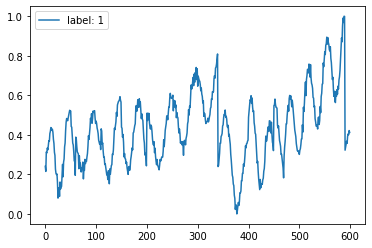

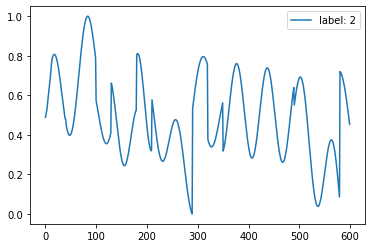

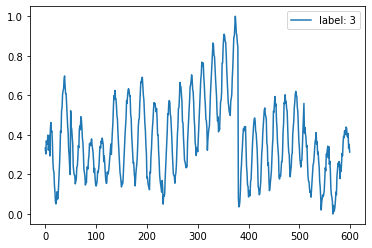

IndexError: list index out of range

In [65]:
l = [1, 2, 3]
for i in range(15):
    if y_test[i] == l[0]:
        plt.plot(X_test_scaled[i], label=f"label: {y_test[i]}")
        plt.legend()
        plt.show()
        del l[0]

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_scaled,y_train)
predictions = mlp.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1769   23    0    0  105  103]
 [  19 1961   18    0    2    0]
 [   0   48 1804  147    0    0]
 [   0    1   58 1941    0    0]
 [  46    5    0    0 1603  346]
 [  30    0    0    0  431 1539]]
              precision    recall  f1-score   support

           1       0.95      0.88      0.92      2000
           2       0.96      0.98      0.97      2000
           3       0.96      0.90      0.93      1999
           4       0.93      0.97      0.95      2000
           5       0.75      0.80      0.77      2000
           6       0.77      0.77      0.77      2000

    accuracy                           0.88     11999
   macro avg       0.89      0.88      0.89     11999
weighted avg       0.89      0.88      0.89     11999



In [75]:
def test_model_flow(X_test, y_test):
    
    flow_scaler = MinMaxScaler()
    X_test_scaled = flow_scaler.fit_transform(X_test)

    predictions = mlp.predict(X_test_scaled)
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))

    fig = plot_confusion_matrix(mlp, X_test, y_test,
                             display_labels=["1","2","3"],
                             cmap=plt.cm.Blues,
                             normalize="true")
    plt.show()

In [83]:
data_dir = "../data/"
file_list = [(data_dir + "20200318-01.csv", 1),
            (data_dir + "20200318-normal-ragnhild.csv", 1),
            (data_dir + "20200318-slow-ragnhild.csv", 2),
            (data_dir + "20200318-fast-ragnhild.csv", 3)]

X_test_flow = np.empty(shape=(1,600))
y_test_flow = np.array([])

for file, label in file_list:
    data = pd.read_csv(
            file, 
            header=None
    )
    data.isnull().values.any()
    print(f"Data shape: {data.shape}")
    
    for i in range(data.shape[0] // 600):
    #for i in range(1):
        d = data.iloc[i*600:(i+1)*600,:].transpose()
        d = np.array(d.iloc[2,:],)
        #plt.plot(test_data)
        #plt.show()
        d = d.reshape(-1, 1).transpose()
        y_test_flow = np.append(y_test_flow, np.array([label,]))
        X_test_flow = np.append(X_test_flow, d, axis=0)
        print(X_test_flow.shape)
        
X_test_flow = X_test_flow[1:,:]
X_test_flow.shape

Data shape: (896, 4)
(2, 600)
Data shape: (3024, 4)
(3, 600)
(4, 600)
(5, 600)
(6, 600)
(7, 600)
Data shape: (994, 4)
(8, 600)
Data shape: (1071, 4)
(9, 600)


(8, 600)

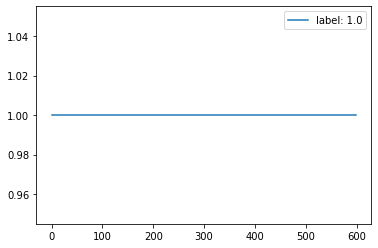

In [84]:
flow_scaler = MinMaxScaler()
X_test_flow_scaled = flow_scaler.fit_transform(X_test_flow)
l = [1, 2, 3]
for i in range(4):
    if y_test_flow[i] == l[0]:
        plt.plot(X_test_flow_scaled[i], label=f"label: {y_test_flow[i]}")
        plt.legend()
        plt.show()
        del l[0]

[[0 5 1]
 [0 1 0]
 [0 0 1]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.17      1.00      0.29         1
         3.0       0.50      1.00      0.67         1

    accuracy                           0.25         8
   macro avg       0.22      0.67      0.32         8
weighted avg       0.08      0.25      0.12         8



/Users/erikjohanneshusom/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


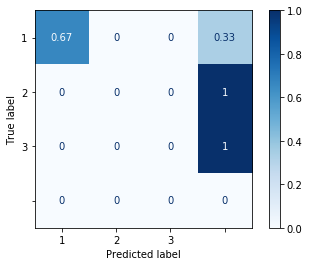

In [85]:
test_model_flow(X_test_flow, y_test_flow)